# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as Agg
from sklearn.metrics import silhouette_score

In [3]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
km = KMeans(n_clusters = 8)                                              # Creating a KMeans model
km.fit(X)


cluster_labels = km.predict(X)                                           # with this we make the clusters for the data points


silhouette_avg_8 = silhouette_score(X, cluster_labels)                     # Calculate the silhouette score
print("The silhouette score of the KMeans model is:", silhouette_avg_8)

The silhouette score of the KMeans model is: 0.5398971441034115


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
km = KMeans(n_clusters = 5)                                              # Creating a KMeans model
km.fit(X)


cluster_labels = km.predict(X)                                           # with this we make the clusters for the data points


silhouette_avg_5 = silhouette_score(X, cluster_labels)                     # Calculate the silhouette score
print("The silhouette score of the KMeans model is:", silhouette_avg_5)

The silhouette score of the KMeans model is: 0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
km = KMeans(n_clusters = 3)                                              # Creating a KMeans model
km.fit(X)


cluster_labels = km.predict(X)                                           # with this we make the clusters for the data points


silhouette_avg_3 = silhouette_score(X, cluster_labels)                     # Calculate the silhouette score
print("The silhouette score of the KMeans model is:", silhouette_avg_3)

The silhouette score of the KMeans model is: 0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

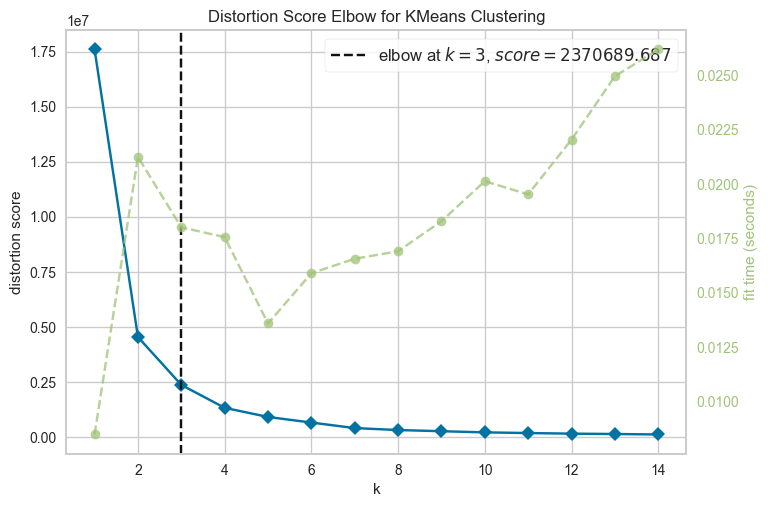

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans()


visual = KElbowVisualizer(modelo, k=(2, 9), metric= 'distortion')


visual.fit(X)


visual.poof()

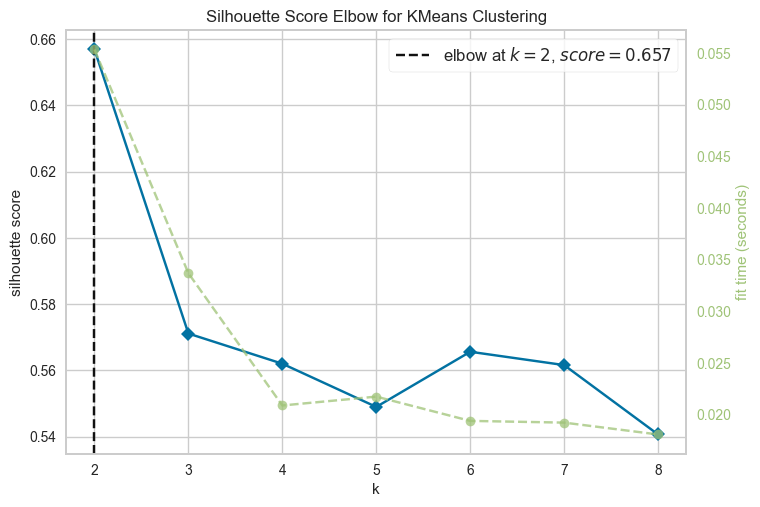

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [23]:
modelo = KMeans()


visual = KElbowVisualizer(modelo, k=(2, 9), metric= 'silhouette')


visual.fit(X)


visual.poof()

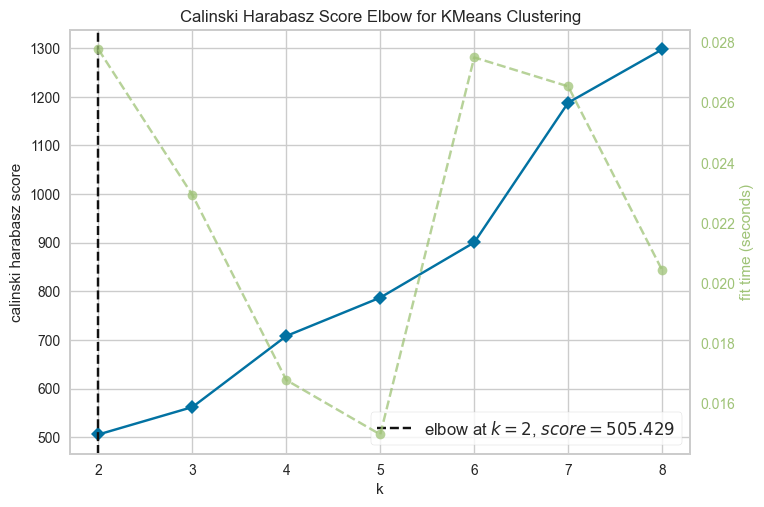

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [30]:
modelo = KMeans()


visual = KElbowVisualizer(modelo, k=(2, 9), metric= 'calinski_harabasz')


visual.fit(X)


visual.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

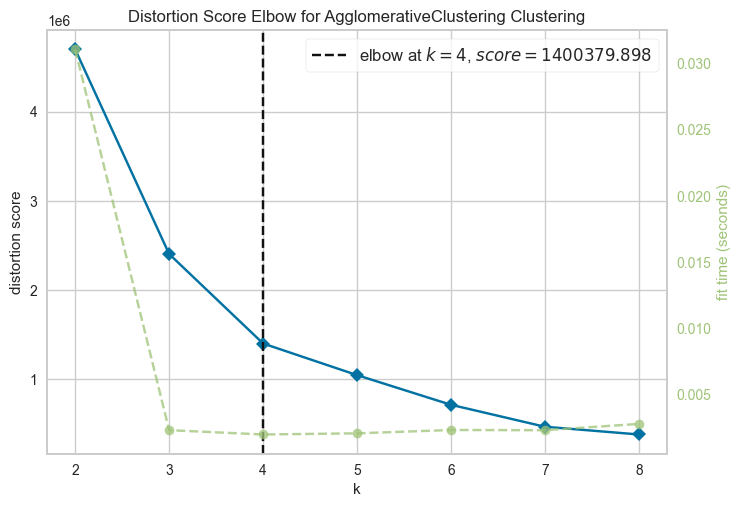

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer

modelo = Agg()


visual = KElbowVisualizer(modelo, k=(2, 9), metric= 'distortion')


visual.fit(X)


visual.poof()

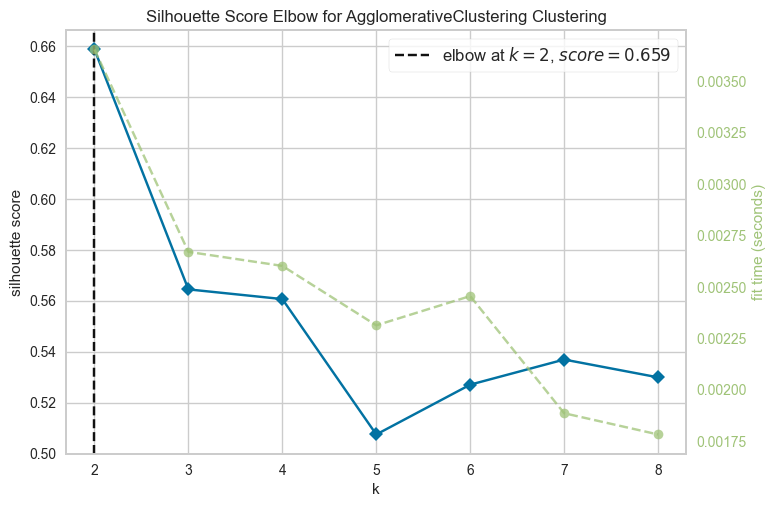

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
modelo = Agg()


visual = KElbowVisualizer(modelo, k=(2, 9), metric= 'silhouette')


visual.fit(X)


visual.poof()

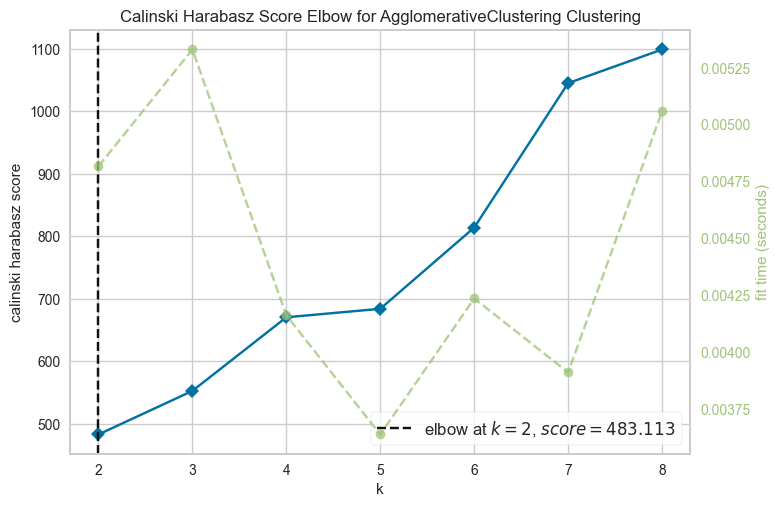

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [29]:
modelo = Agg()


visual = KElbowVisualizer(modelo, k=(2, 9), metric= 'calinski_harabasz')


visual.fit(X)


visual.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [45]:
# Create a KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
cluster_labels = kmeans.labels_

cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

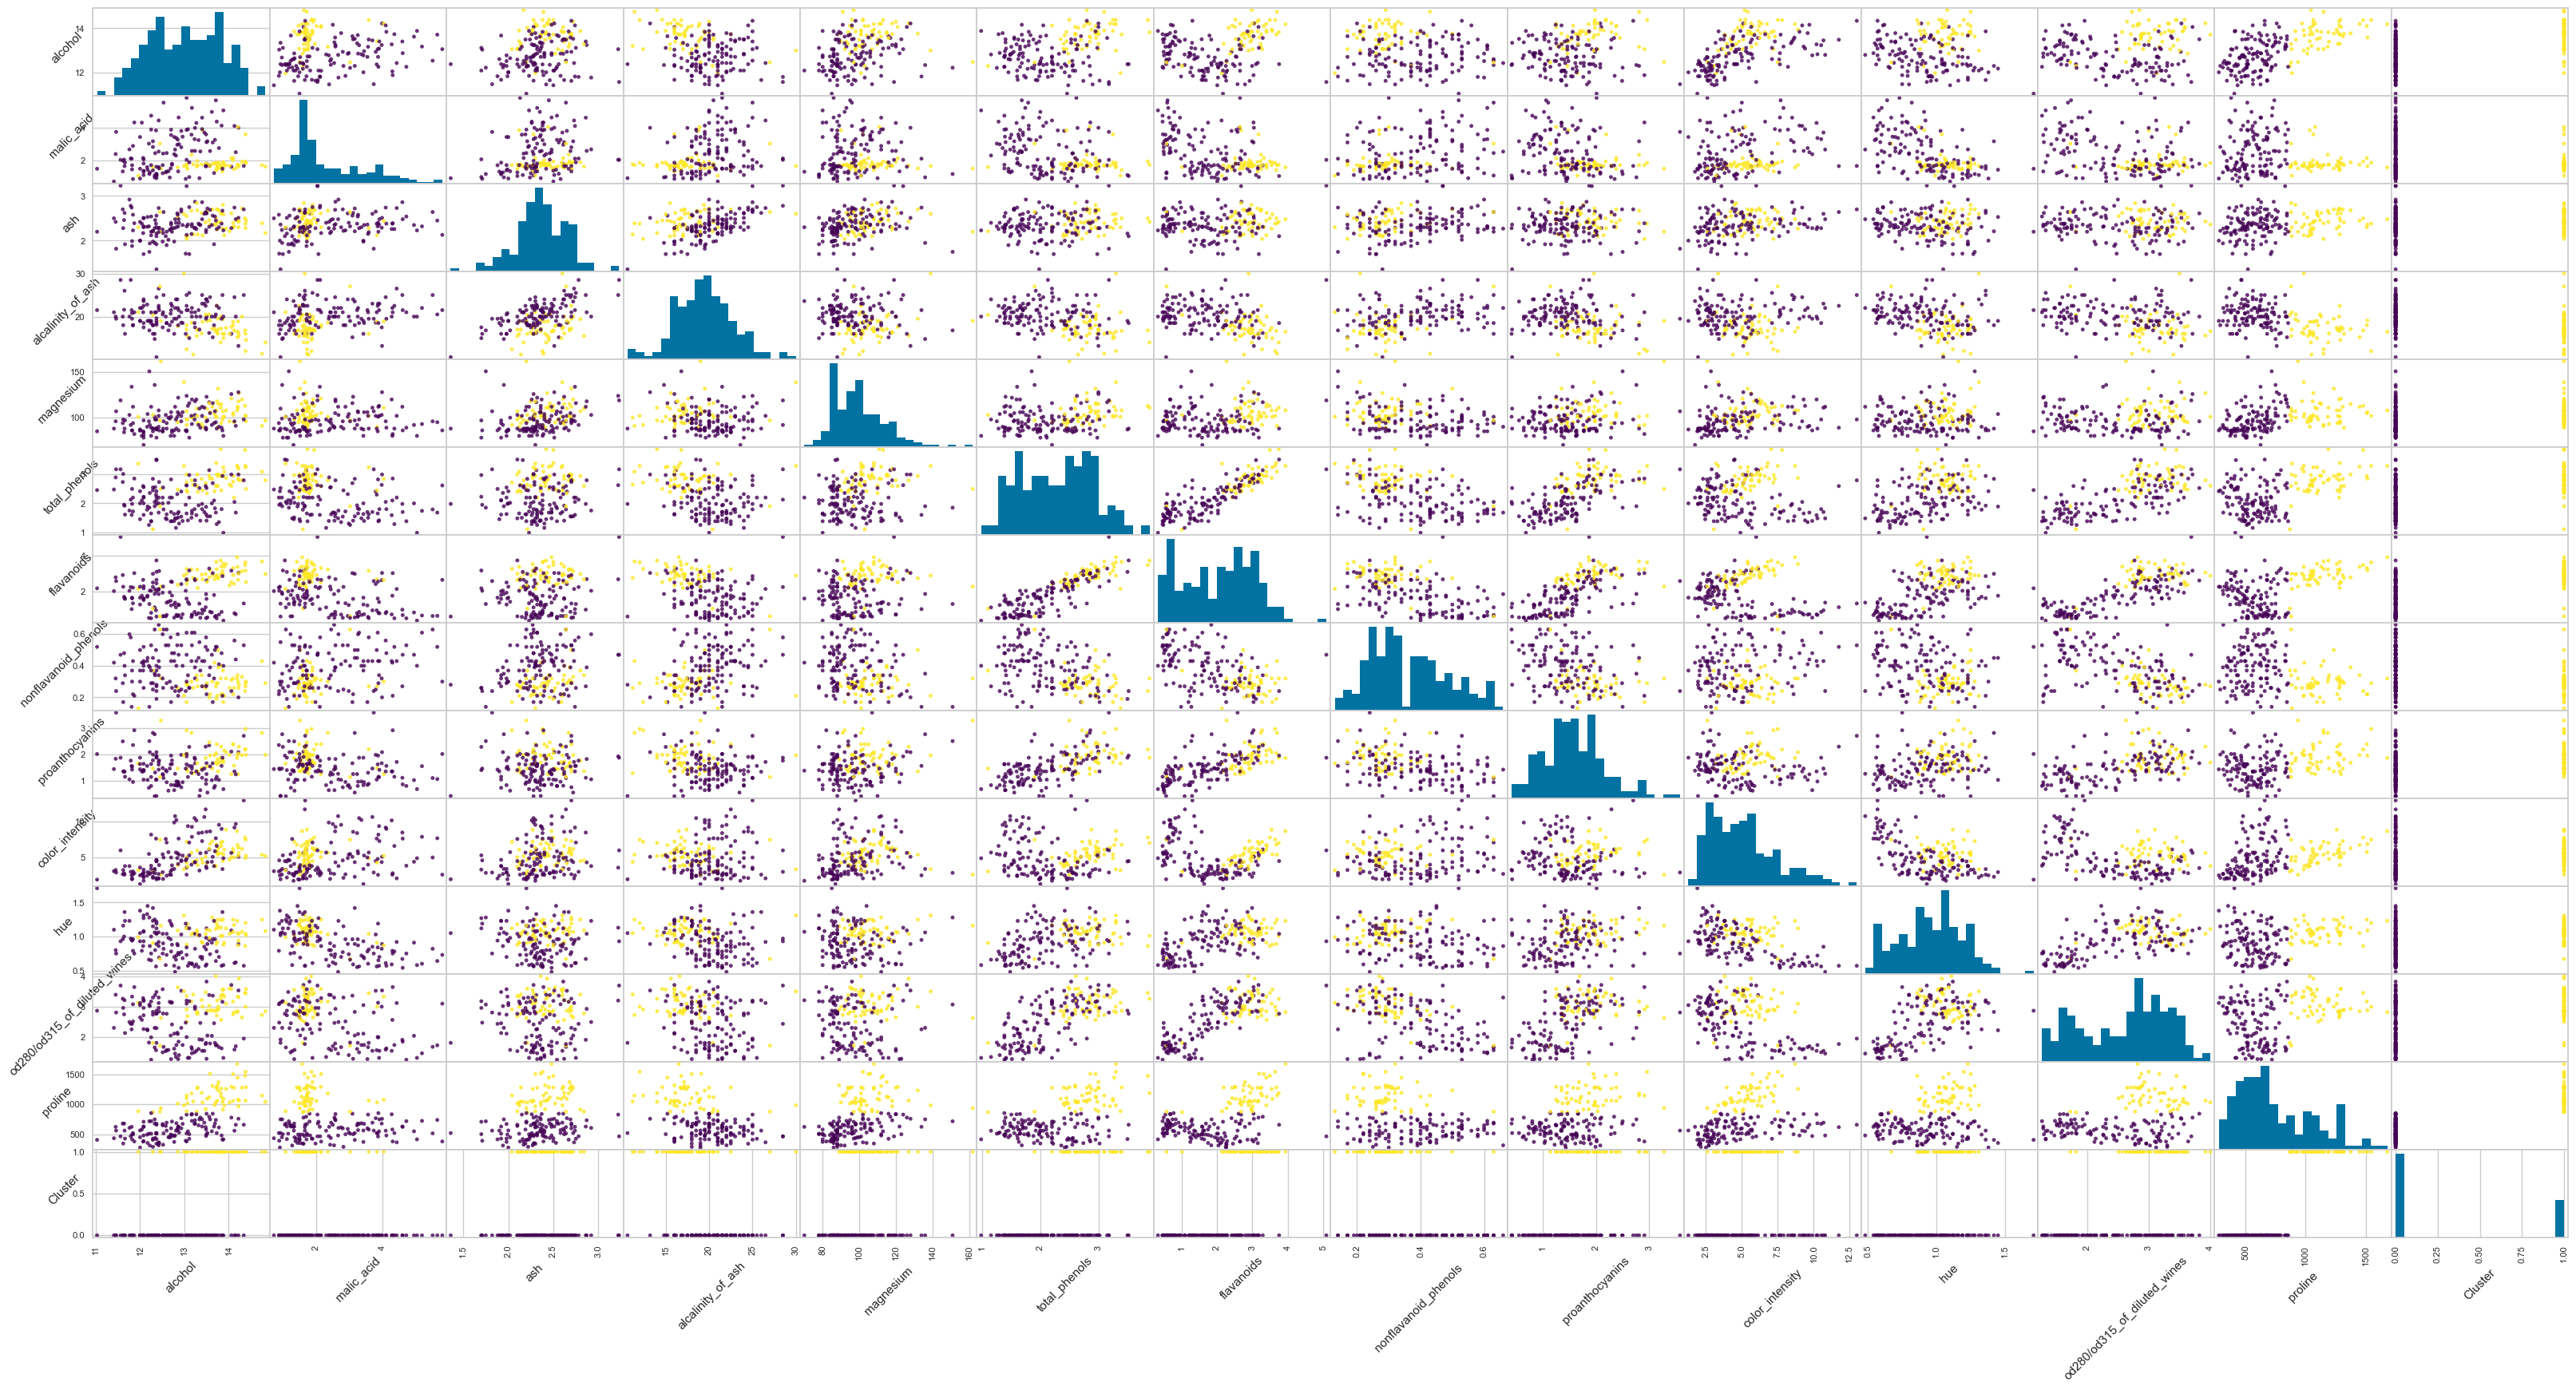

In [50]:
# Convert data to a DataFrame
df = pd.DataFrame(X)
df['Cluster'] = cluster_labels

# Create scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(df, c = df['Cluster'], figsize = (40, 20), hist_kwds = {'bins': 20}, alpha = 0.8, cmap='viridis')

for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)  # Rotate x-axis labels by 45 degrees
    ax.yaxis.label.set_rotation(45)  # Rotate y-axis labels by 45 degrees


# Show plot
plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

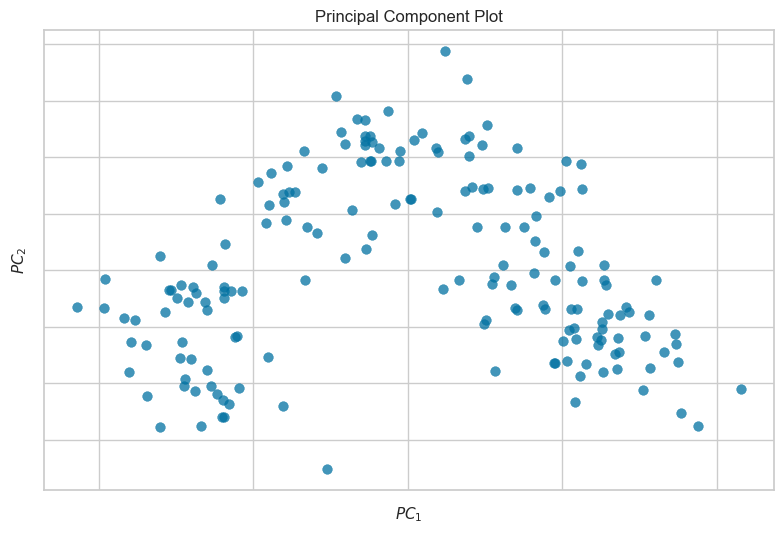

PCA(ax=<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>)

In [59]:
# This is for the plot of the transformed data

from yellowbrick.features import pca_decomposition


# Create, fit, and show the visualizer
pca_decomposition(
    X, y, scale=True)


## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

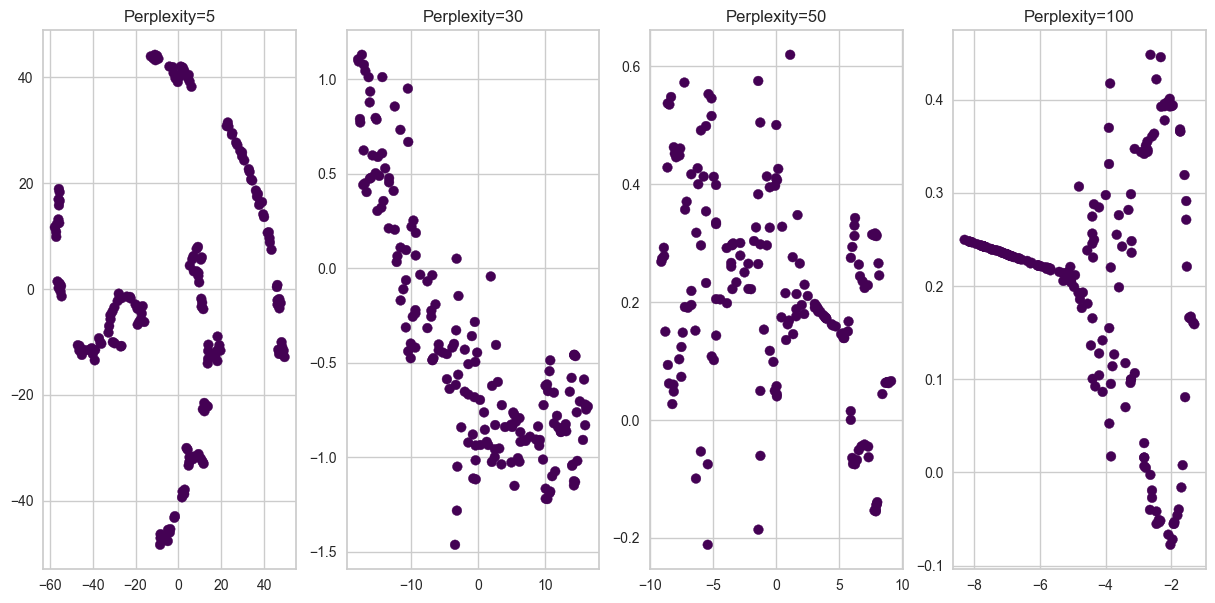

In [64]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7))

for i,p in enumerate([5, 30, 50, 100]):
    
    tsne=TSNE(perplexity=p)
    
    x_emb=tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y, cmap='viridis')
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();